<a href="https://colab.research.google.com/github/aneeshyder777/deep_learning/blob/main/Linear_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

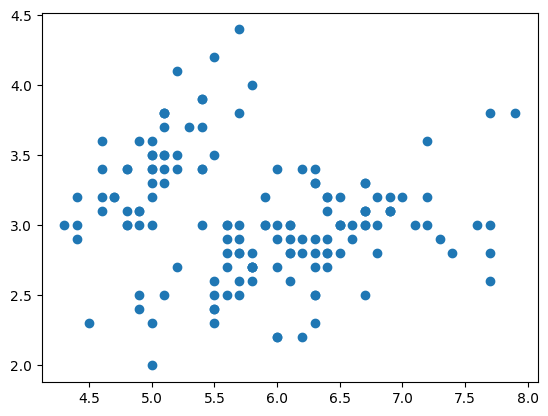

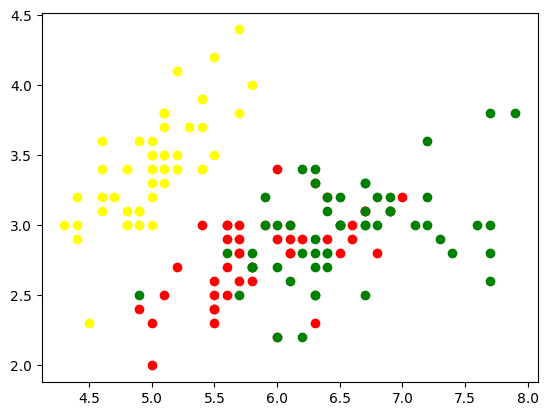

-1.2014547513861218
17


In [15]:
#Implementation of Gaussian Mixture Model in python

"""
Suppose there are a set of data points that need to be grouped into several parts or clusters based on their similarity. In Machine Learning, this is known as Clustering. There are several methods available for clustering:

K Means Clustering
Hierarchical Clustering
Gaussian Mixture Models

"""

#Gaussian Mixture Model

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame
from sklearn import datasets
from sklearn.mixture import GaussianMixture

# load the iris dataset
iris = datasets.load_iris()

# select first two columns
X = iris.data[:, :5]

# turn it into a dataframe
d = pd.DataFrame(X)

# plot the data
plt.scatter(d[0], d[1])
plt.show()

# Create a GaussianMixture instance with 3 components
gmm = GaussianMixture(n_components=3) # Initialize the GMM model here


# Fit the GMM model for the dataset
# which expresses the dataset as a
# mixture of 3 Gaussian Distributions
gmm.fit(d)

# Assign a label to each sample
labels = gmm.predict(d)
d['labels']= labels
d0 = d[d['labels']== 0]
d1 = d[d['labels']== 1]
d2 = d[d['labels']== 2]

# plot three clusters in same plot
plt.scatter(d0[0], d0[1], c ='r')
plt.scatter(d1[0], d1[1], c ='yellow')
plt.scatter(d2[0], d2[1], c ='g')
plt.show()


# print the converged log-likelihood value
print(gmm.lower_bound_)

# print the number of iterations needed
# for the log-likelihood value to converge
print(gmm.n_iter_)

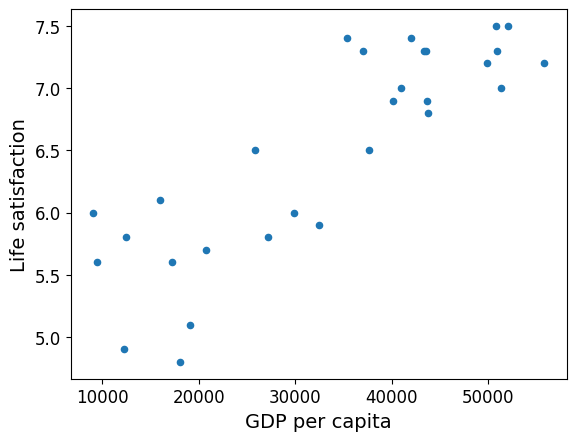

[[5.96242338]]


In [8]:
#Training and running a linear model using Scikit-Learn


# Python ≥3.5 is required
import sys

import matplotlib

assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
import pandas
assert sklearn.__version__ >= "0.20"

#This function just merges the OECD's life satisfaction data and the IMF's GDP per capita data.
def prepare_country_stats(oecd_bli, gdp_per_capita):
 oecd_bli = oecd_bli[oecd_bli["INEQUALITY"] == "TOT"]
 oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
 gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
 gdp_per_capita.set_index("Country", inplace=True)
 full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                               left_index=True, right_index=True)
 full_country_stats.sort_values(by="GDP per capita", inplace=True)
 remove_indices = [0, 1, 6, 8, 33, 34, 35]
 keep_indices = list(set(range(36)) - set(remove_indices))
 return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]


import os
datapath = os.path.join("datasets", "lifesat", "")

# To plot pretty figures directly within Jupyter
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)



# Download the data
import urllib.request
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
os.makedirs(datapath, exist_ok=True)
for filename in ("oecd_bli_2015.csv", "gdp_per_capita.csv"):
    print("Downloading", filename)
    url = DOWNLOAD_ROOT + "datasets/lifesat/" + filename
    urllib.request.urlretrieve(url, datapath + filename)


# Code example
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

# Load the data
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

# Select a linear model
model = sklearn.linear_model.LinearRegression()

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
print(model.predict(X_new)) # outputs [[ 5.96242338]]